In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pdb

In [2]:
def generate_data(student_id, N=500, K=5):
    np.random.seed(student_id)
    n_samples = np.random.multinomial(N, np.ones(K)/K)
    X, assignment = make_blobs(
        n_samples=n_samples,
        cluster_std=np.exp(np.random.uniform(-1, 0, size=K)),
        random_state=student_id
        )
    return X

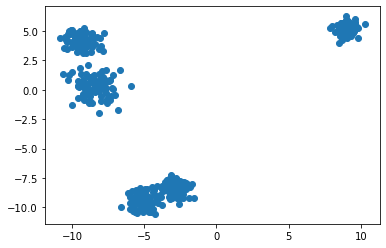

In [27]:
X  = generate_data(28751795)

plt.scatter(X.T[0],X.T[1])
plt.show()


In [249]:
print(X.shape)

(500, 2)


# Question 1 

In [4]:
#define the membership probabilities
def prob_membership(x,y,pi,theta):
    mu_x, mu_y, sigma_x, sigma_y = theta
    prob = pi/(sigma_x*sigma_y) * np.exp(-0.5*(sigma_x**-2)*(x-mu_x)**2) * np.exp(-0.5*(sigma_y**-2)*(y-mu_y)**2)
    return prob

def expectation(x,y,pi,theta):
    #create array to store the weights
    membership_matrix = np.zeros((N,K))
    mu_x, mu_y, sigma_x, sigma_y = theta
    #store the weights 
    for k in range(K):
        theta = mu_x[k], mu_y[k], sigma_x[k], sigma_y[k] 
        p_k = prob_membership(x,y,pi[k], theta)
        membership_matrix[:,k] = p_k
    
    #define the weights of each point
    sum_k = np.sum(membership_matrix, axis = 1)
    w = membership_matrix/sum_k[:, np.newaxis]
    
    #define and return the log likelihood
    ll = 0 
    for i in range(len(x)):
        ll += np.log(np.sum(pi/(2*np.pi*sigma_y*sigma_x) * np.exp(-(x[i]-mu_x)**2/(2*sigma_x**2)) * np.exp(-(y[i]-mu_y)**2/(2*sigma_y**2))))
    return w , ll  
        

# Question 2 

In [5]:
def maximisation(x,y,w):
    
    #number of points belonging to that model
    N_k = np.sum(w,axis = 0)
    
    #such that the new membership probabilities are:
    new_pi = N_k/N
    
    #prepare to store new parameters of the model
    new_mu_x = np.zeros(K)
    new_mu_y = np.zeros(K)
    new_sigma_x = np.zeros(K)
    new_sigma_y = np.zeros(K)
    
    #update the new parameters
    for k in range(K):
        new_mu_x[k] = np.dot(w[:, k], x)/N_k[k]
        new_mu_y[k] = np.dot(w[:, k], y)/N_k[k]
        new_sigma_x[k] = np.sqrt(np.dot(w[:, k], (x - new_mu_x[k])**2)/N_k[k])
        new_sigma_y[k] = np.sqrt(np.dot(w[:, k], (y - new_mu_y[k])**2)/N_k[k])
    return new_pi, new_mu_x, new_mu_y, new_sigma_x, new_sigma_y

# Question 3 

In [18]:
def expectation_maximization(x, y, pi, mu_x, mu_y, sigma_x, sigma_y): 
    ll = 0 
    i = 0
    delta_ll_list = []
    ll_list = []
    #loop until threshold is met
    while True:
        print(i)
        #expectation
        w,new_ll = expectation(x, y, pi, (mu_x, mu_y, sigma_x, sigma_y))
        #maximisation 
        pi, mu_x, mu_y, sigma_x, sigma_y = maximisation(x,y,w)
        delta_ll = abs(new_ll - ll)
        #to plot with later
        delta_ll_list.append(delta_ll)
        ll_list.append(new_ll)
        ll = new_ll
        i += 1 
        if (delta_ll < 1e-5): #threshold
            break
    
    return pi, mu_x, mu_y, sigma_x, sigma_y, ll_list, delta_ll_list, w

In [19]:
theta_list = []
w_list = []
x = X.T[0]
y = X.T[1]

N = 500
K = 5
#initial guess for the model parameters
pi =  np.array([0.2, 0.2, 0.2, 0.2, 0.2])
sigma_x = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
sigma_y = np.array([1.0, 1.0, 1.0, 1.0, 1.0])
mu_x = np.array([-10.0,-8.0,-5.0,-3.0,10.0])
mu_y = np.array([3.0,0.0,-8.0,-9.0,5.0])

#randomly set the weights of each point 
w_init = (1/K) * np.random.multinomial(K, np.ones(K)/K, size=N)

#run 
pi, new_mu_x, new_mu_y, new_sigma_x, new_sigma_y, ll_list, delta_ll_list, w = expectation_maximization(x, y, pi, mu_x, mu_y, sigma_x, sigma_y)

0
1
2
3
4
5
6
7
8
9
10
11
12


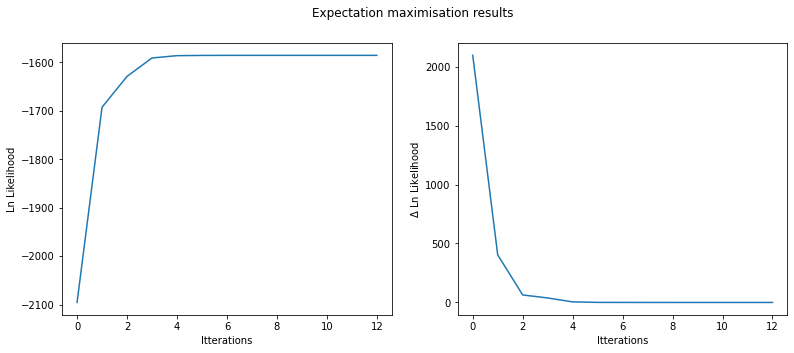

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

axes[0].plot(ll_list)
axes[0].set_ylabel('Ln Likelihood')
axes[0].set_xlabel('Itterations')
axes[1].plot(delta_ll_list)
axes[1].set_ylabel('$\Delta$ Ln Likelihood')
axes[1].set_xlabel('Itterations')
fig.suptitle('Expectation maximisation results')
plt.show()

# Question 4 

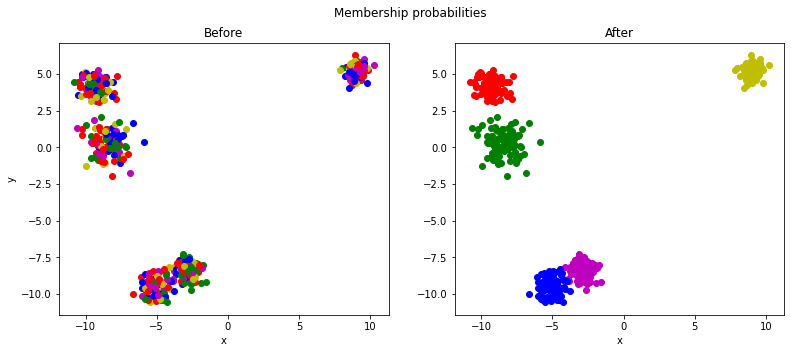

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

colour_list = ['r','g','b','m','y']

for i in range(len(x)):
    tmp = np.argmax(w_init[i])
    tmp2 = np.argmax(w[i])
    axes[0].scatter(x[i],y[i], c = colour_list[tmp])
    axes[1].scatter(x[i],y[i], c = colour_list[tmp2])
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[1].set_xlabel('x')
axes[0].set_title('Before')
axes[1].set_title('After')
fig.suptitle('Membership probabilities')
plt.show()

I also wanted to plot the guassians over the data because I thought it would look nice. 

In [23]:
def plot_2d_gaussian(mu_x, mu_y, sigma_x, sigma_y, c):
    mean = [mu_x, mu_y]
    cov = [[sigma_x**2, 0],[0,sigma_y**2]]
    x_p, y_p = np.mgrid[-12:12:.1, -12:8:.1]
    pos = np.dstack((x_p, y_p))

    # Calculate the probability density function (PDF) of the Gaussian distribution
    pdf = np.exp(-0.5 * np.einsum('ijk,kl,ijl->ij', pos - mean, np.linalg.inv(cov), pos - mean)) / (2 * np.pi * np.sqrt(np.linalg.det(cov)))

    # Plot the contour plot of the PDF
    ax.contour(x_p, y_p, pdf, 3, cmap=c, extent = (mu_x - 3*sigma_x , mu_x + 3*sigma_x, mu_y - 3*sigma_y, mu_y + 3*sigma_y ))



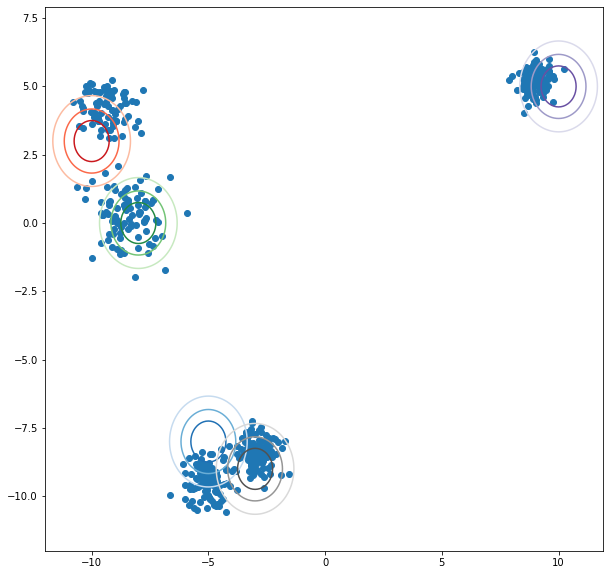

In [24]:
#plotting the inital conditions
fig, ax = plt.subplots(figsize=(10, 10))
x = X.T[0]
y = X.T[1]

c_list = ['Reds','Greens','Blues','Greys','Purples']

ax.scatter(x,y, label="Data")
for k in range(K): 
    plot_2d_gaussian(mu_x[k],mu_y[k],sigma_x[k], sigma_y[k], c_list[k])
plt.show()

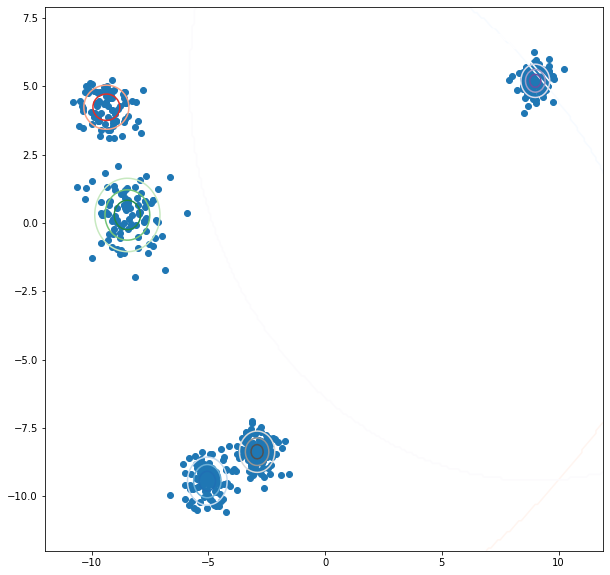

In [25]:
#plotting the final parameters
fig, ax = plt.subplots(figsize=(10, 10))
x = X.T[0]
y = X.T[1]

c_list = ['Reds','Greens','Blues','Greys','Purples']

ax.scatter(x,y, label="Data")
for k in range(K): 
    plot_2d_gaussian(new_mu_x[k],new_mu_y[k],new_sigma_x[k], new_sigma_y[k], c_list[k])
plt.show()
    

# Question 5 

In [10]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=50)
# Who are these people?!
print(faces.target_names)


# # What do their faces look like?
print(faces.images.shape) #looks like 62x47 pixcel and 1560 images

# The target name index for each image (0 = Ariel Sharon, etc)
print(faces.target.shape)

print(faces.target)


['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Jacques Chirac' 'Jean Chretien'
 'John Ashcroft' 'Junichiro Koizumi' 'Serena Williams' 'Tony Blair']
(1560, 62, 47)
(1560,)
[11  4  2 ...  3 11  5]


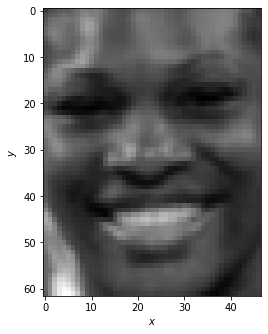

In [11]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
faces = fetch_lfw_people(min_faces_per_person=50)
fig, ax = plt.subplots(figsize=(4, 4.75))
ax.imshow(faces.images[12], cmap="binary_r")
ax.set_xlabel(r"$x$")
ax.set_ylabel(r"$y$")
fig.tight_layout()

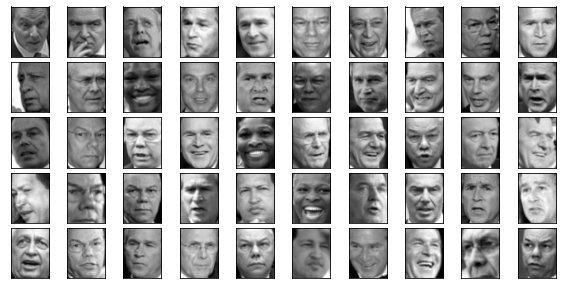

In [12]:
#test plot the faces 
fig, axes = plt.subplots(
5, 10,
figsize=(10, 5),
subplot_kw={'xticks':[], 'yticks':[]},
gridspec_kw=dict(hspace=0.1, wspace=0.1)
)

for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i], cmap="binary_r")

In [13]:
#Number of components to consider
N = 150 

#run PCA
pca = PCA(N, svd_solver='randomized').fit(faces.data)
components = pca.components_


In [237]:
print(components.shape)

(150, 2914)


(150, 62, 47)


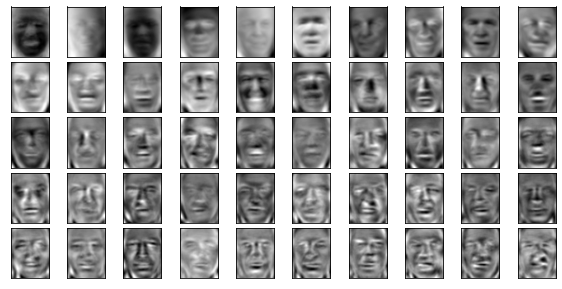

In [238]:
shape = (150, *faces.images.shape[1:])
components = components.reshape(shape)

print(components.shape)

fig, axes = plt.subplots(5, 10,
                        figsize=(10, 5),
                        subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1)
                        )

# This plots the first 50 Pc since there are 50 plots created and looped for 50 components 
for i, ax in enumerate(axes.flat):
    ax.imshow(components[i], cmap="binary_r")

# Question 6 

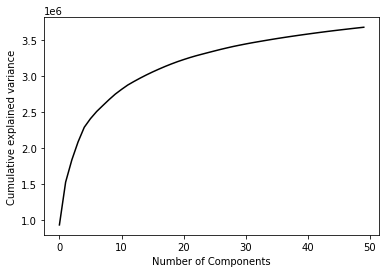

In [239]:

# get explained variance for each component
ev = pca.explained_variance_

# cumulative explained variance for first 50 components:
cum_ev = np.cumsum(ev)[:50]
# and plot
plt.plot(cum_ev, c='k')
plt.xlabel("Number of Components")
plt.ylabel(r"Cumulative explained variance")
plt.show();

# Question 7

In [15]:
#Project the PCS onto the faces
pcs = pca.transform(faces.data)

In [16]:
#number of unique faces
n = len(faces.target_names)
n_list = np.arange(n)

# create an index list for the location of each person. 
name_idx = []

for n in n_list: 
    idx = np.where(faces.target == n)[0][0] #get the first appearance of the person.
    name_idx.append(idx)

# components of each of these faces
face_components = pcs[name_idx]
# reconstruct
reconstructed_faces = pca.inverse_transform(face_components)

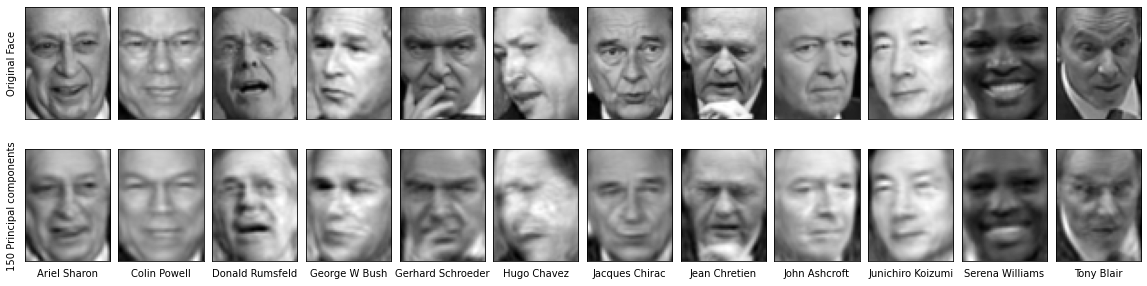

In [17]:
# setup fig
fig, axes = plt.subplots(2, 12, figsize=(20, 5),
                          subplot_kw={'xticks':[], 'yticks':[]},
                          gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, f in enumerate(name_idx):
    name = faces.target_names[i]
    face = faces.images[f]
    #reconstruc the faces
    new_face = reconstructed_faces[i].reshape(62, 47)
    axes[0, i].imshow(face, cmap='binary_r')
    axes[1, i].imshow(new_face, cmap='binary_r')
    axes[1, i].set_xlabel(name)
axes[0,0].set_ylabel("Original Face")
axes[1,0].set_ylabel("150 Principal components");